In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_excel('IPL sample data.xlsx')
df.head()


,Pick,Y->,Clean Pick,N->,Fumble,C->,Catch,DC->,Dropped Catch,S->,Stumping,Unnamed: 11,Unnamed: 12
0,Throw,Y->,Good Throw,N->,Bad throw,DH->,Dirct Hit,RO->,Run Out,MR->,Missed Runout,NaN,NaN
1,Runs,"""+"" stands for runs saved ""-"" stands for runs ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Match No.,Innings,Teams,Player Name,BallCount,Position,Pick,Throw,Runs,Overcount,Venue,Stadium
4,NaN,IPL2367,1,Delhi Capitals,Rilee russouw,0.1,Short mid wicket,n,NaN,1,1,Delhi,Arun Jaitly Stadium


In [5]:
print("Column Names:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())


Column Names: ['Pick', 'Y->', 'Clean Pick', 'N->', 'Fumble', 'C->', 'Catch', 'DC->', 'Dropped Catch', 'S->', 'Stumping', 'Unnamed: 11', 'Unnamed: 12']

Missing Values:
 Pick             72
Y->              43
Clean Pick       20
N->              52
Fumble           55
C->              52
Catch            55
DC->             55
Dropped Catch    58
S->              63
Stumping         52
Unnamed: 11      53
Unnamed: 12      61
dtype: int64


In [6]:
print("\nSummary Statistics:\n", df.describe())

df = df.drop(columns=['Unnamed: 11', 'Unnamed: 12'], errors='ignore')
df.fillna(0, inplace=True)
print("Missing Values After Cleaning:\n", df.isnull().sum())

df.head()



Summary Statistics:
          Pick      Y-> Clean Pick             N-> Fumble C-> Catch DC->  \
count       2       31         54              22     19  22    19   19   
unique      2       20         37               8     13  17    12    7   
top     Throw  IPL2367          1  Delhi Capitals      1   0     0    Y   
freq        1       12         14              12      4   5     6    8   

       Dropped Catch S-> Stumping Unnamed: 11          Unnamed: 12  
count             16  11       22          21                   13  
unique             6   5       10           8                    2  
top                0   1        2       Delhi  Arun Jaitly Stadium  
freq               6   4        7          12                   12  
Missing Values After Cleaning:
 Pick             0
Y->              0
Clean Pick       0
N->              0
Fumble           0
C->              0
Catch            0
DC->             0
Dropped Catch    0
S->              0
Stumping         0
dtype: int64


,Pick,Y->,Clean Pick,N->,Fumble,C->,Catch,DC->,Dropped Catch,S->,Stumping
0,Throw,Y->,Good Throw,N->,Bad throw,DH->,Dirct Hit,RO->,Run Out,MR->,Missed Runout
1,Runs,"""+"" stands for runs saved ""-"" stands for runs ...",0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,Match No.,Innings,Teams,Player Name,BallCount,Position,Pick,Throw,Runs,Overcount
4,0,IPL2367,1,Delhi Capitals,Rilee russouw,0.1,Short mid wicket,n,0,1,1


Clean Pick
0                   20
1                   14
2                    2
PS=9                 2
PS=11                2
3                    2
Clean Picks (CP)     1
Innings              1
Good Throw           1
4                    1
Name: count, dtype: int64


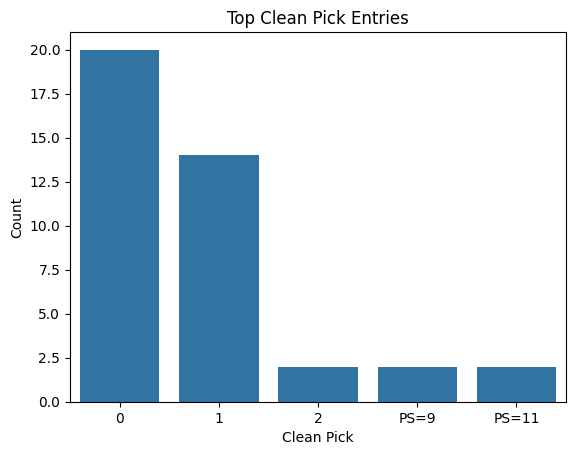

In [7]:
print(df['Clean Pick'].value_counts().head(10))

sns.countplot(x='Clean Pick', data=df, order=df['Clean Pick'].value_counts().index[:5])
plt.title('Top Clean Pick Entries')
plt.xlabel('Clean Pick')
plt.ylabel('Count')
plt.show()


In [8]:
columns = ['Catch', 'Fumble', 'Dropped Catch', 'Stumping']

for col in columns:
    print(f"\n{col} value counts:\n", df[col].value_counts())

df[columns].apply(pd.Series.value_counts).T.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('IPL Fielding Action Distribution')
plt.ylabel('Count')
plt.xlabel('Action Type')
plt.legend(title='Value')
plt.show()



Catch value counts:
 Catch
0                   55
0                    6
Short mid wicket     2
point                2
Dirct Hit            1
wicket keeper        1
Position             1
cover point          1
covers               1
long off             1
bowler               1
Stumpings (S)        1
1                    1
Name: count, dtype: int64

Fumble value counts:
 Fumble
0                55
1                 4
Kuldeep yadav     2
0                 2
Lalit yadav       2
Bad throw         1
Yash Dhull        1
Phil Salt         1
Rilee russouw     1
Player Name       1
Aman Khan         1
Axer Patel        1
Catches (C)       1
2                 1
Name: count, dtype: int64

Dropped Catch value counts:
 Dropped Catch
0                       58
0                        6
Y                        6
Throw                    1
Run Out                  1
Missed Run Outs (MR)     1
1                        1
Name: count, dtype: int64

Stumping value counts:
 Stumping
0                 

TypeError: '<' not supported between instances of 'str' and 'int'

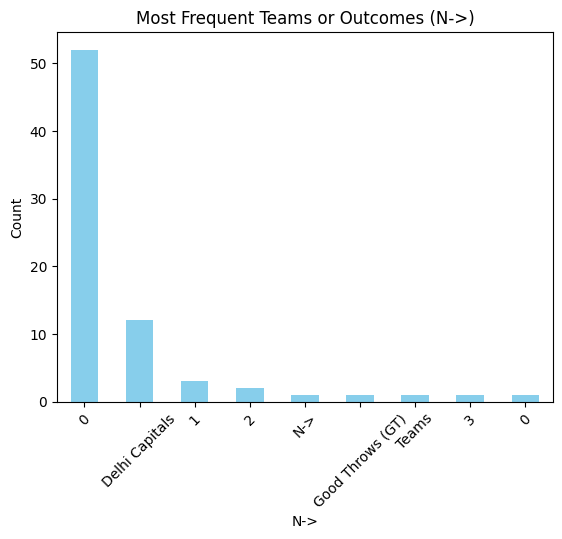

In [9]:
df['N->'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Most Frequent Teams or Outcomes (N->)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [10]:
df.to_excel("Cleaned_IPL_Data.xlsx", index=False)
print("✅ Cleaned data exported as Excel file.")


✅ Cleaned data exported as Excel file.


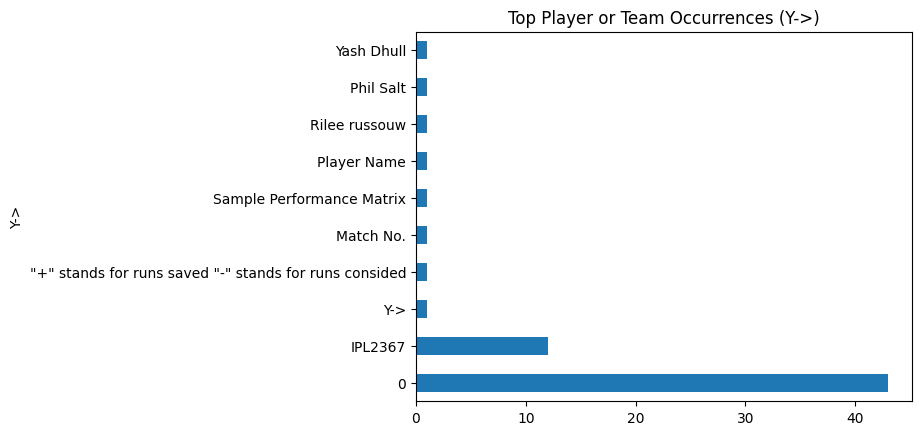

In [11]:
df['Y->'].value_counts().head(10).plot(kind='barh')
plt.title("Top Player or Team Occurrences (Y->)")
plt.show()
